# Streamlilt Project: Gradebeam Foundation Ananlysis with Springs

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import handcalcs.render
import forallpeople
handcalcs.set_option('param_columns', 5)
handcalcs.set_option('display_precision', 3)
forallpeople.environment('structural', top_level=True) 

import math
from PyNite import FEModel3D
from PyNite.Visualization import render_model
from rich import print
import pandas as pd
import matplotlib.pyplot as plt
import fdn_model as fdn

spring_stiffness = 108.00

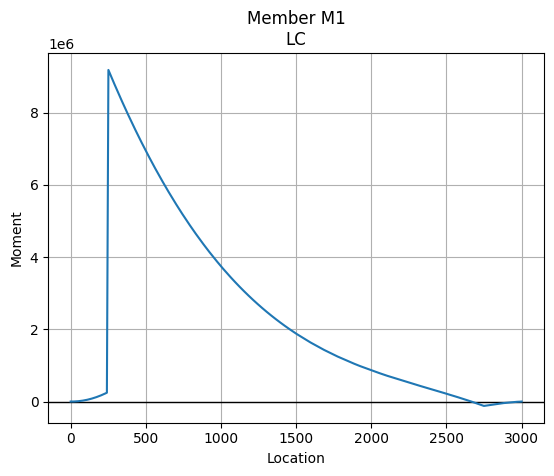

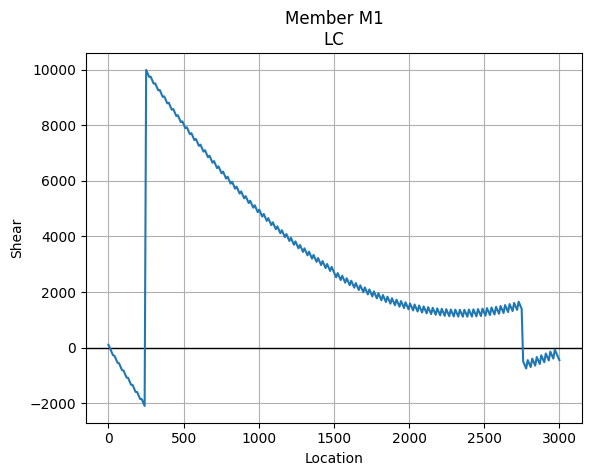

spring_stiffness = 360.00

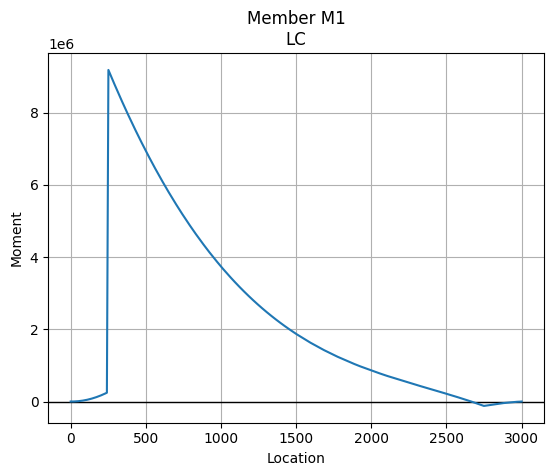

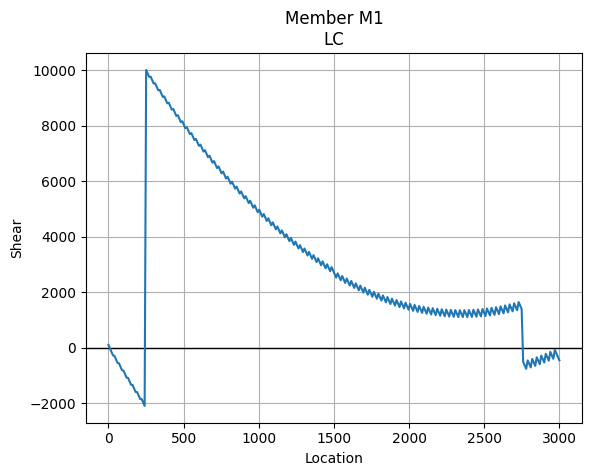

spring_stiffness = 22500.00

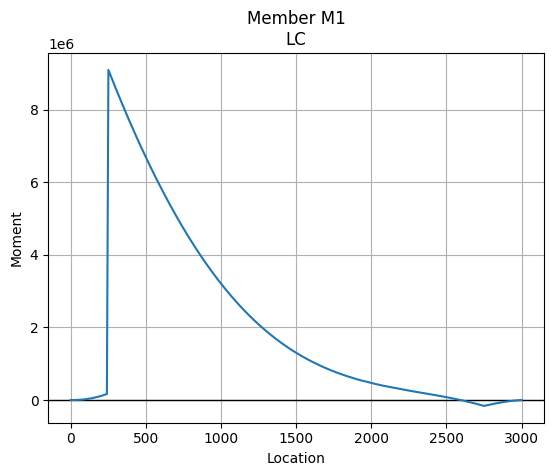

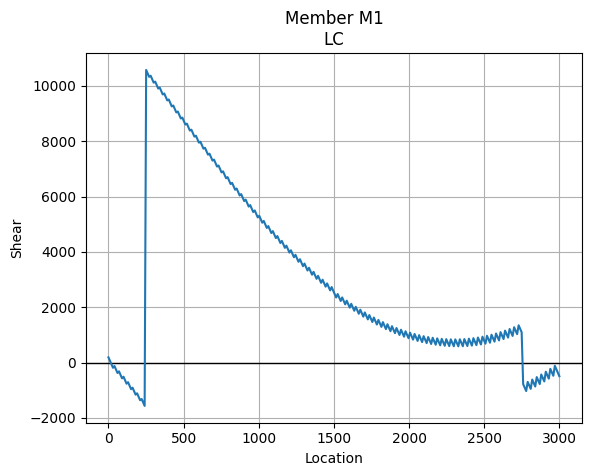

In [38]:
beam_ppts = {   "name": "Concrete",
                "L": 3000,
                "w": 750,
                "E": 20124, # MPa 20MPa conc
                "A": 750*750, # mm2 750x750 lock block
                "Iz": 26367e6, # mm4; 750x750 lock block
                "Iy": 26367e6, # mm4; 750x750 lock block
                "nu": 0.18, # 20MPa conc
                "rho": 24e-6, # N/mm3; 20MPa conc
                "J": 44480e6	 # mm4 750x750 lock block
            }

subgrade_mod = [4.8e-3, 16e-3, 1]  #N/mm3
n_springs = 100
Fy_rxns_dict = {}

for mod in subgrade_mod:
    FBD_model, nodes = fdn.grade_beam(**beam_ppts, subgrade_modulus=mod, n_springs=n_springs) #send subgrade modulus; sand 4.8 - 16e-3 N/mm3
    FBD_model.analyze() # Changes the model by performing the analysis and adding analysis results
    # M_mid = round(FBD_model.Members['M1'].moment('Mz', 1500, 'LC3')/1e6, 1)
    # V_mid = round(FBD_model.Members['M1'].shear('Fy', 1500, 'LC3')/1e3, 1)
    # print(f"at {mod = }, {M_mid = }, {V_mid = }")
    FBD_model.Members['M1'].plot_moment('Mz', combo_name='LC', n_points=300)
    FBD_model.Members['M1'].plot_shear("Fy", combo_name='LC', n_points=300)
    
    Fy_rxns = []
    for node in nodes:
        Fy = round(FBD_model.Nodes[node].RxnFY["LC"], 1)
        Fy_rxns.append(Fy)

    Fy_rxns_dict[mod] = Fy_rxns
        
    # render_model(FBD_model, combo_name='LC3', annotation_size=50)

<Axes: >

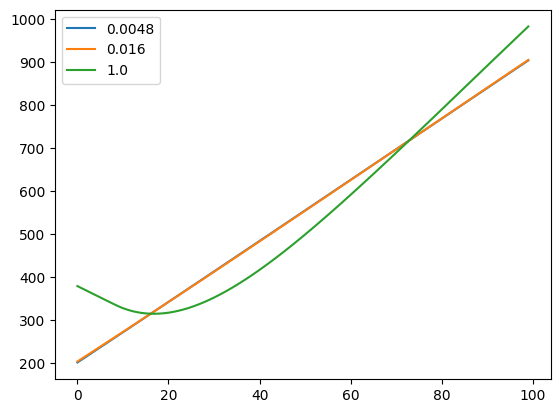

In [10]:
df = pd.DataFrame(Fy_rxns_dict)
df.plot(kind='line')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import fdn_input as fi
import fdn_model as fm

In [7]:
fi.gb_model.analyze(log=True, check_statics=True, max_iter=100)

+-----------+
| Analyzing |
+-----------+

- Analyzing load combination LC
- Adding nodal spring support stiffness terms to global stiffness matrix
- Adding spring stiffness terms to global stiffness matrix
- Adding member stiffness terms to global stiffness matrix
- Adding quadrilateral stiffness terms to global stiffness matrix
- Adding plate stiffness terms to global stiffness matrix
- Checking nodal stability
- Calculating global displacement vector
- Checking for tension/compression-only support spring convergence
- Checking for tension/compression-only spring convergence
- Checking for tension/compression-only member convergence
- Tension/compression-only analysis converged after 1 iteration(s)
- Calculating reactions

- Analysis complete

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
| Load Combination | Sum FX | Sum RX |   Sum 

In [7]:
A_dx = fi.L / fi.n_springs * fi.w
# print(A_dx)
pressures = []
for key, value in fi.gb_model.Nodes.items():
    pressures.append(value.RxnFY["LC"]/A_dx*1000)

In [8]:
pressures

[10.398553430707098,
 34.27811281843154,
 52.88851035824951,
 69.1613969375752,
 85.51845888489966,
 102.87375321411405,
 122.17383760760168,
 150.83357096231896,
 146.22420041458835,
 72.14960537151393]

In [23]:
fi.gb_model.Members["M1"].DistLoads

[('FY', -2.0, -15.0, 0.0, 10000.0, 'LC')]

In [15]:
import numpy as np
L = 10000
n_springs = 10
x_chunks = np.linspace(0, L, n_springs+1)
x_supports = list((x_chunks[:-1] + x_chunks[1:]) / 2)
x_coord = [0.0] + x_supports + [L]

In [16]:
x_coord

[0.0,
 500.0,
 1500.0,
 2500.0,
 3500.0,
 4500.0,
 5500.0,
 6500.0,
 7500.0,
 8500.0,
 9500.0,
 10000]

In [17]:
for i in x_coord:
    if i in x_supports:
        print(i)

500.0
1500.0
2500.0
3500.0
4500.0
5500.0
6500.0
7500.0
8500.0
9500.0
